In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import datetime
import os

from matplotlib.ticker import FuncFormatter
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from os import path
from matplotlib import ticker

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300

# Figure. 2. The average of cumulative convergence episodes for all M.

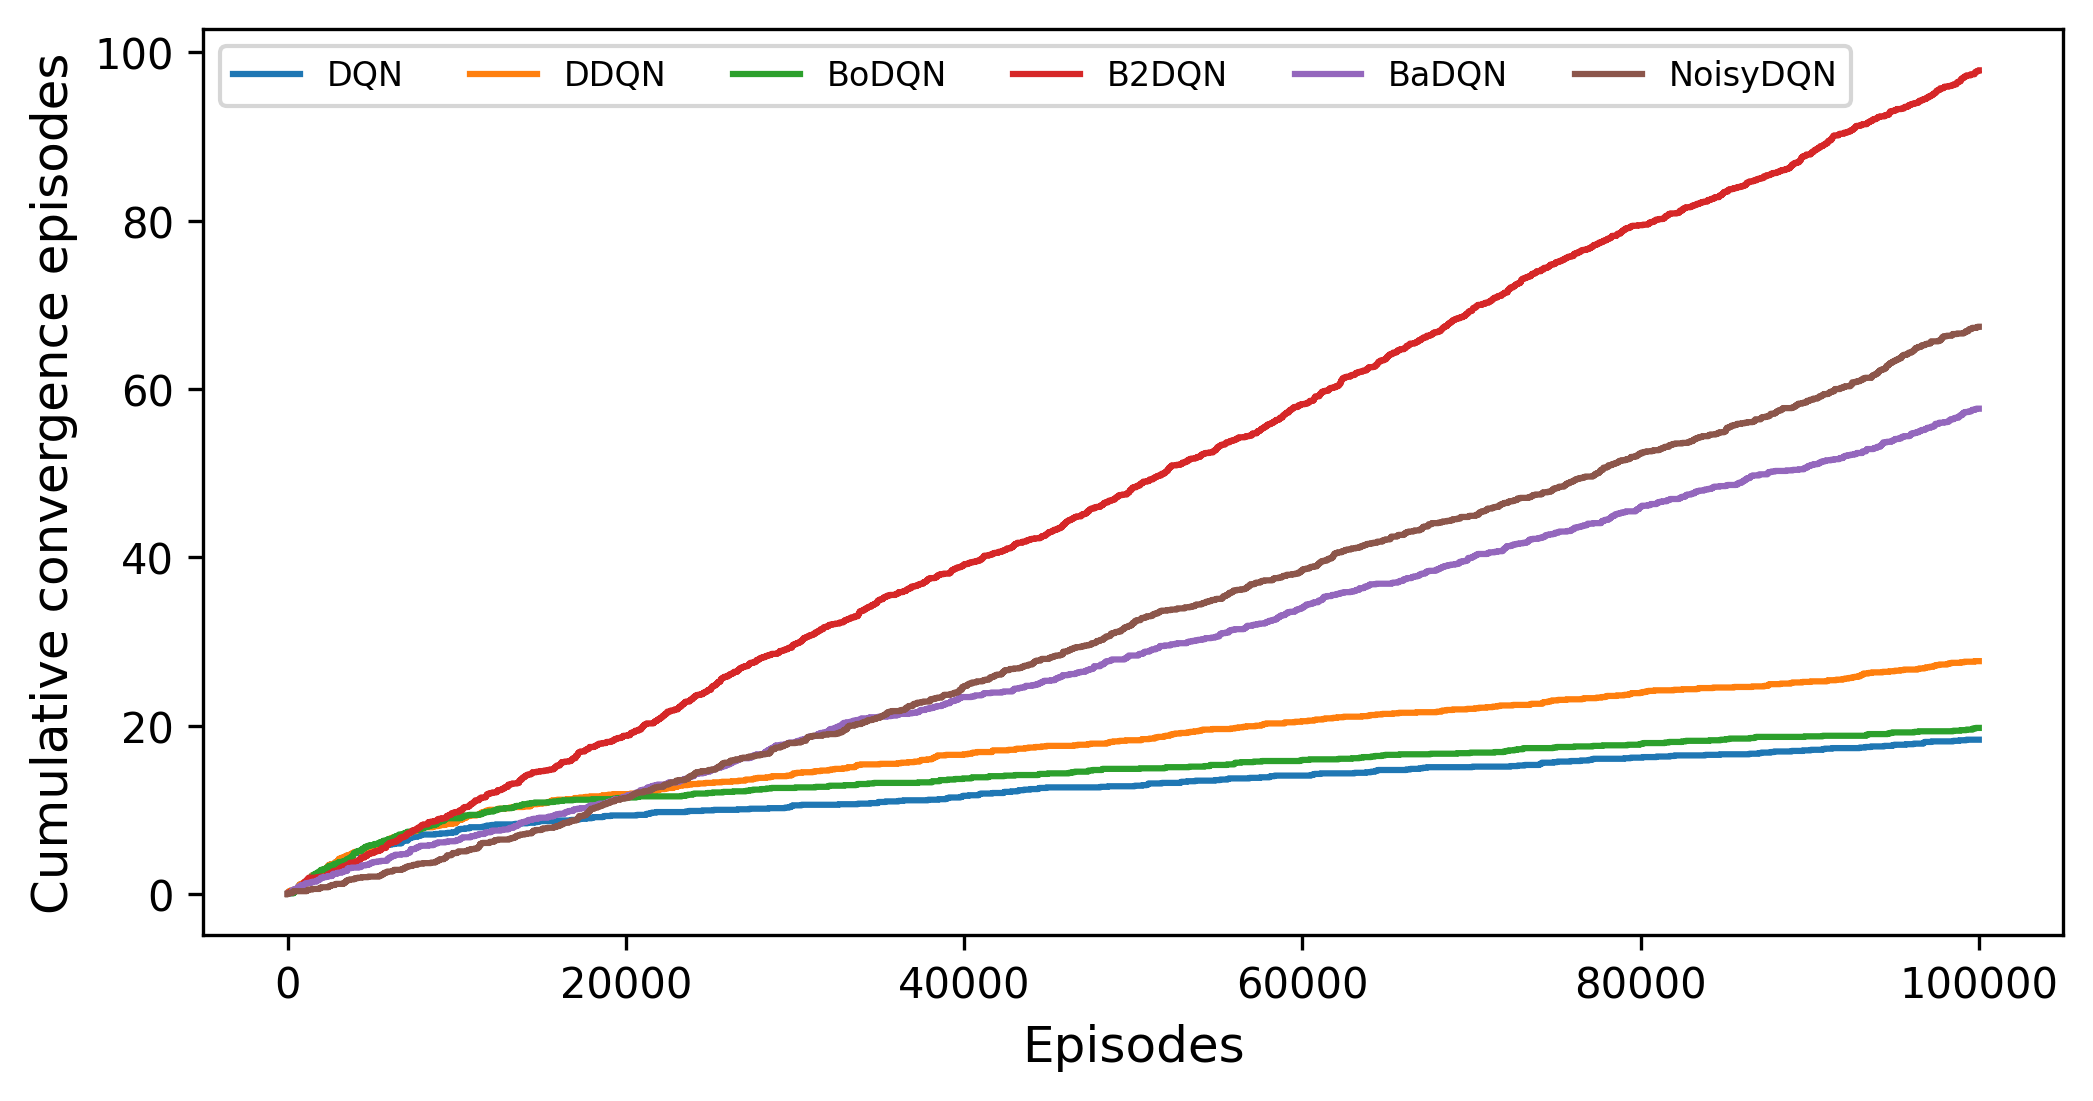

In [7]:

cwd = os.getcwd()
interval_stat = 1
title = 'successful_cum'

def prep (x):
    x['interval'] = np.ceil((x['episode'])/interval_stat)
    x_rewards = x.groupby(['interval'], as_index=False).agg({'reward':np.mean, 'timesteps':np.sum, 'successful':np.sum})
    x_rewards['valid_actions'] = x_rewards['timesteps'] - interval_stat
    x_conv = x[x['timesteps']==10].groupby(['interval'], as_index=False).agg({'timesteps':np.size})
    x_stat = pd.merge(x_rewards, x_conv, on='interval', how='left')
    x_stat = x_stat.fillna(0)
    x_stat['reword_mean_cum'] = x_stat['reward'].cumsum()
    x_stat['valid_actions_cum'] = x_stat['valid_actions'].cumsum()
    x_stat['successful_cum'] = x_stat['successful'].cumsum()
    return x_stat

def prep_stat (cwd):
    df = pd.DataFrame()
    for root, dirs, files in os.walk(cwd):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                df_t = pd.read_table(os.path.join(root,file), sep=',')
                df = df.append(prep(df_t))
    return df.groupby(['interval'], as_index=False).mean()

dqn = prep_stat(cwd+str("/fig_dqn"))
ddqn = prep_stat(cwd+str("/fig_ddqn"))
bo = prep_stat(cwd+str("/fig_bodqn"))
ba = prep_stat(cwd+str("/fig_badqn"))
noisynet = prep_stat(cwd+str("/fig_noisynet"))
b2 = prep_stat(cwd+str("/fig_b2dqn"))

fig, ax1 = plt.subplots()
ax1.plot(dqn['interval'], dqn[title], label='DQN')
ax1.plot(ddqn['interval'], ddqn[title], label='DDQN')
ax1.plot(bo['interval'], bo[title], label='BoDQN')
ax1.plot(b2['interval'], b2[title], label='B2DQN')
ax1.plot(ba['interval'], ba[title], label='BaDQN')
ax1.plot(noisynet['interval'], noisynet[title], label='NoisyDQN')


ax1.legend(prop={'size': 8}, loc='upper left', ncol=7, numpoints = 1)
ax1.set_xlabel('Episodes', fontsize=12)
ax1.set_ylabel('Cumulative convergence episodes', fontsize=12)
# plt.savefig('CCE.png')
plt.show()


# Figure.3(a) Average episode reward.

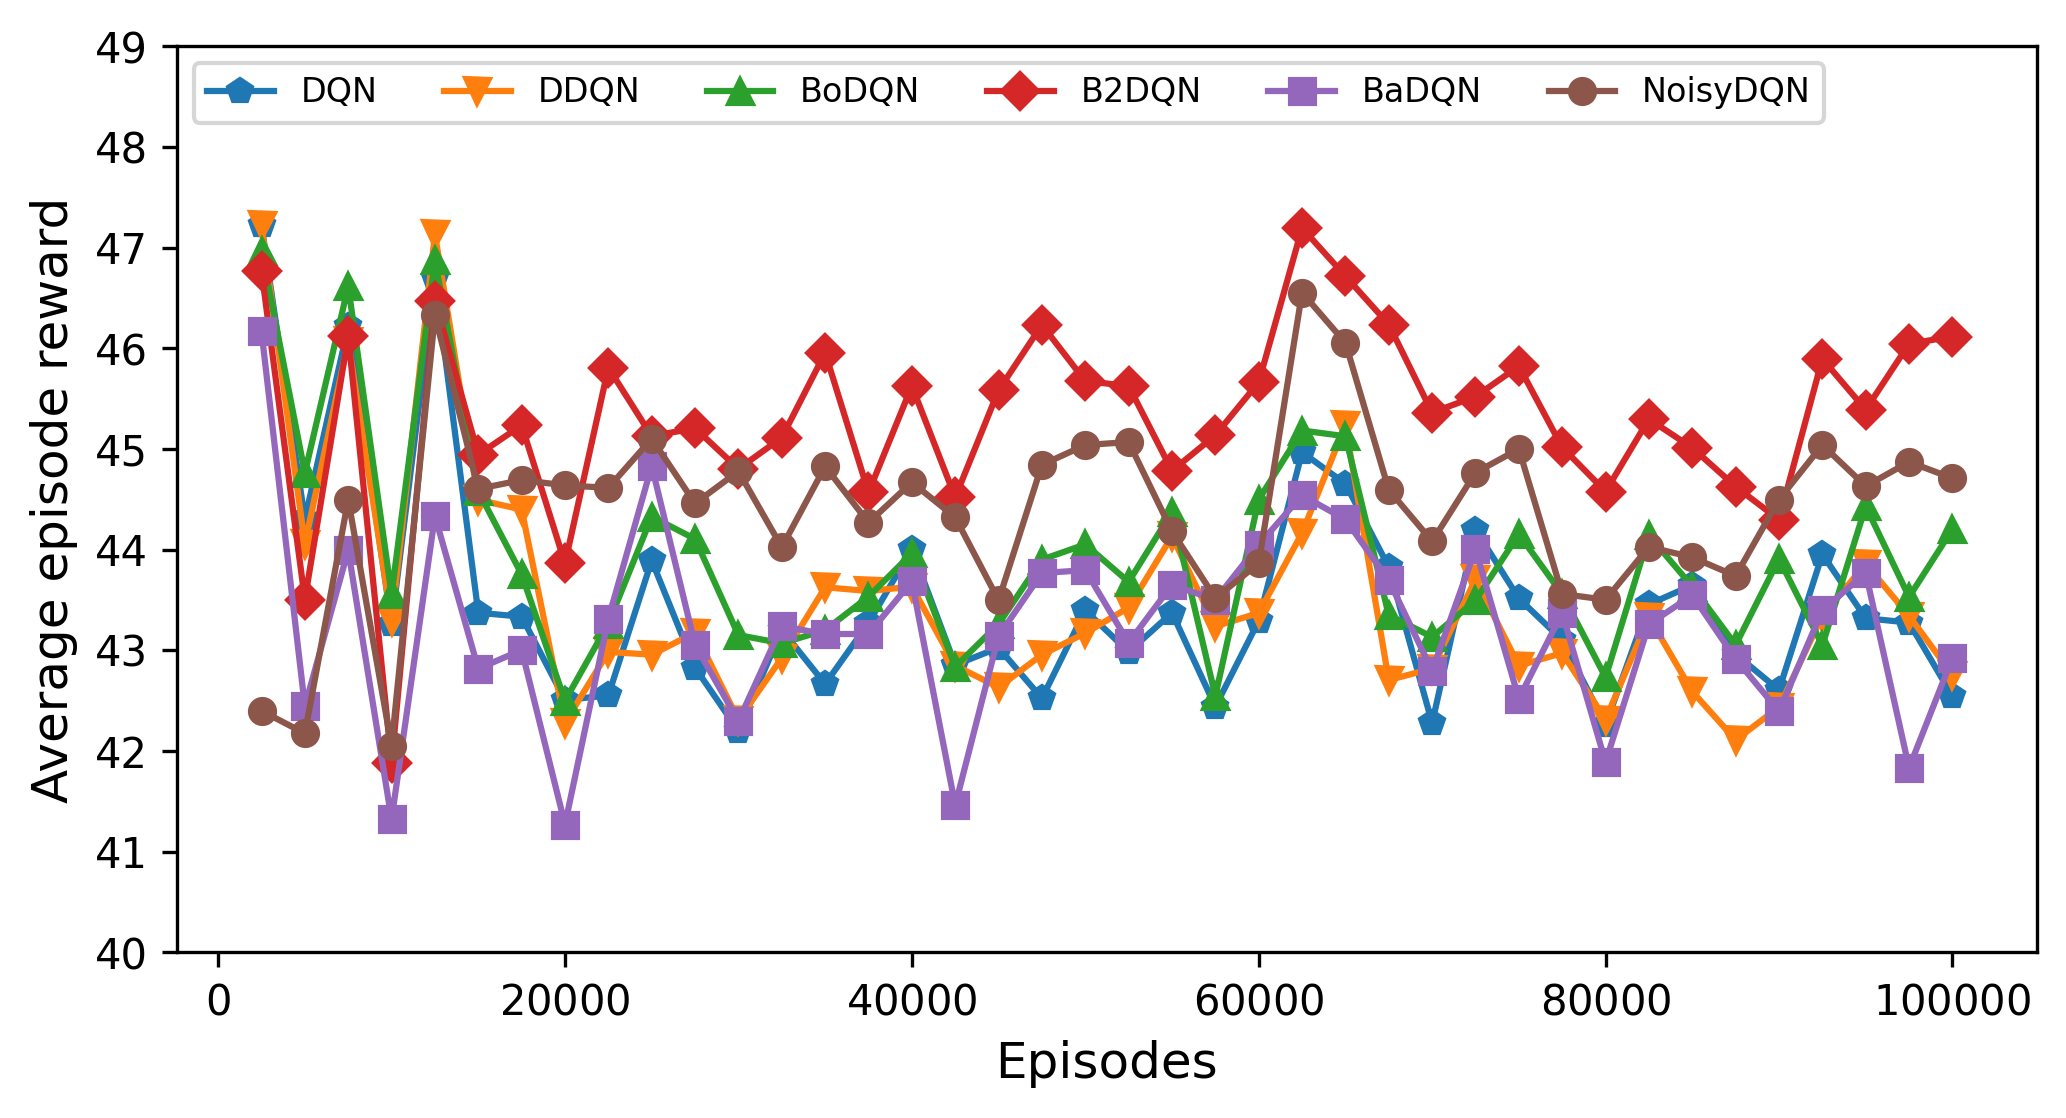

In [5]:
# 获得数据存放目录

cwd = os.getcwd()
interval_stat = 2500
title = 'reward' #rewards conv_episodes_cum successful_cum valid_actions_sum valid_actions_cum

def prep (x):
    x['interval'] = np.ceil((x['episode'])/interval_stat)    
    x_rewards = x.groupby(['interval'], as_index=False).agg({'reward':np.mean, 'timesteps':np.sum, 'successful':np.sum})
    x_rewards['valid_actions'] = x_rewards['timesteps'] - interval_stat
    x_conv = x[x['timesteps']==10].groupby(['interval'], as_index=False).agg({'timesteps':np.size})
    x_stat = pd.merge(x_rewards, x_conv, on='interval', how='left')
    x_stat = x_stat.fillna(0)
    x_stat['reword_mean_cum'] = x_stat['reward'].cumsum()
    x_stat['valid_actions_cum'] = x_stat['valid_actions'].cumsum()
    x_stat['successful_cum'] = x_stat['successful'].cumsum()
    return x_stat

def prep_stat (cwd):
    df = pd.DataFrame()
    for root, dirs, files in os.walk(cwd):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                df_t = pd.read_table(os.path.join(root,file), sep=',')
                df = df.append(prep(df_t))
    return df.groupby(['interval'], as_index=False).mean(), df.groupby(['interval'], as_index=False).std()

b2_cwd = cwd+str("/fig_b2dqn")
ba_cwd = cwd+str("/fig_badqn")
bo_cwd = cwd+str("/fig_bodqn")
noisynet_cwd = cwd+str("/fig_noisynet")
ddqn_cwd = cwd+str("/fig_ddqn")
dqn_cwd = cwd+str("/fig_dqn")

dqn, dqn_std = prep_stat(dqn_cwd)
ddqn, ddqn_std = prep_stat(ddqn_cwd)
bo, bo_std = prep_stat(bo_cwd)
ba, ba_std = prep_stat(ba_cwd)
noisynet, noisynet_std = prep_stat(noisynet_cwd)
b2, b2_std = prep_stat(b2_cwd)

fig, ax1 = plt.subplots()
ax1.plot(dqn['interval'], dqn[title], marker='p', label='DQN')
ax1.plot(ddqn['interval'], ddqn[title], marker='v', label='DDQN')
ax1.plot(bo['interval'], bo[title], marker='^', label='BoDQN')
ax1.plot(b2['interval'], b2[title], marker='D', label='B2DQN')
ax1.plot(ba['interval'], ba[title], marker='s', label='BaDQN')
ax1.plot(noisynet['interval'], noisynet[title], marker='o', label='NoisyDQN')

plt.ylim(40,49)
ax1.legend(prop={'size': 8}, loc='upper left', ncol=7, numpoints = 1)
ax1.set_xlabel('Episodes', fontsize=12)
ax1.set_ylabel('Average episode reward', fontsize=12)

x_up = 100000/interval_stat
x_0 = 0
x_1 = x_up*0.2
x_2 = x_up*0.4
x_3 = x_up*0.6
x_4 = x_up*0.8
plt.xticks([x_0, x_1, x_2, x_3, x_4, x_up], [r'$0$', r'$20000$', r'$40000$', r'$60000$', r'$80000$', r'$100000$'])
# plt.savefig('AR.png')
plt.show()

# Figure.3(b) Average valid actions.

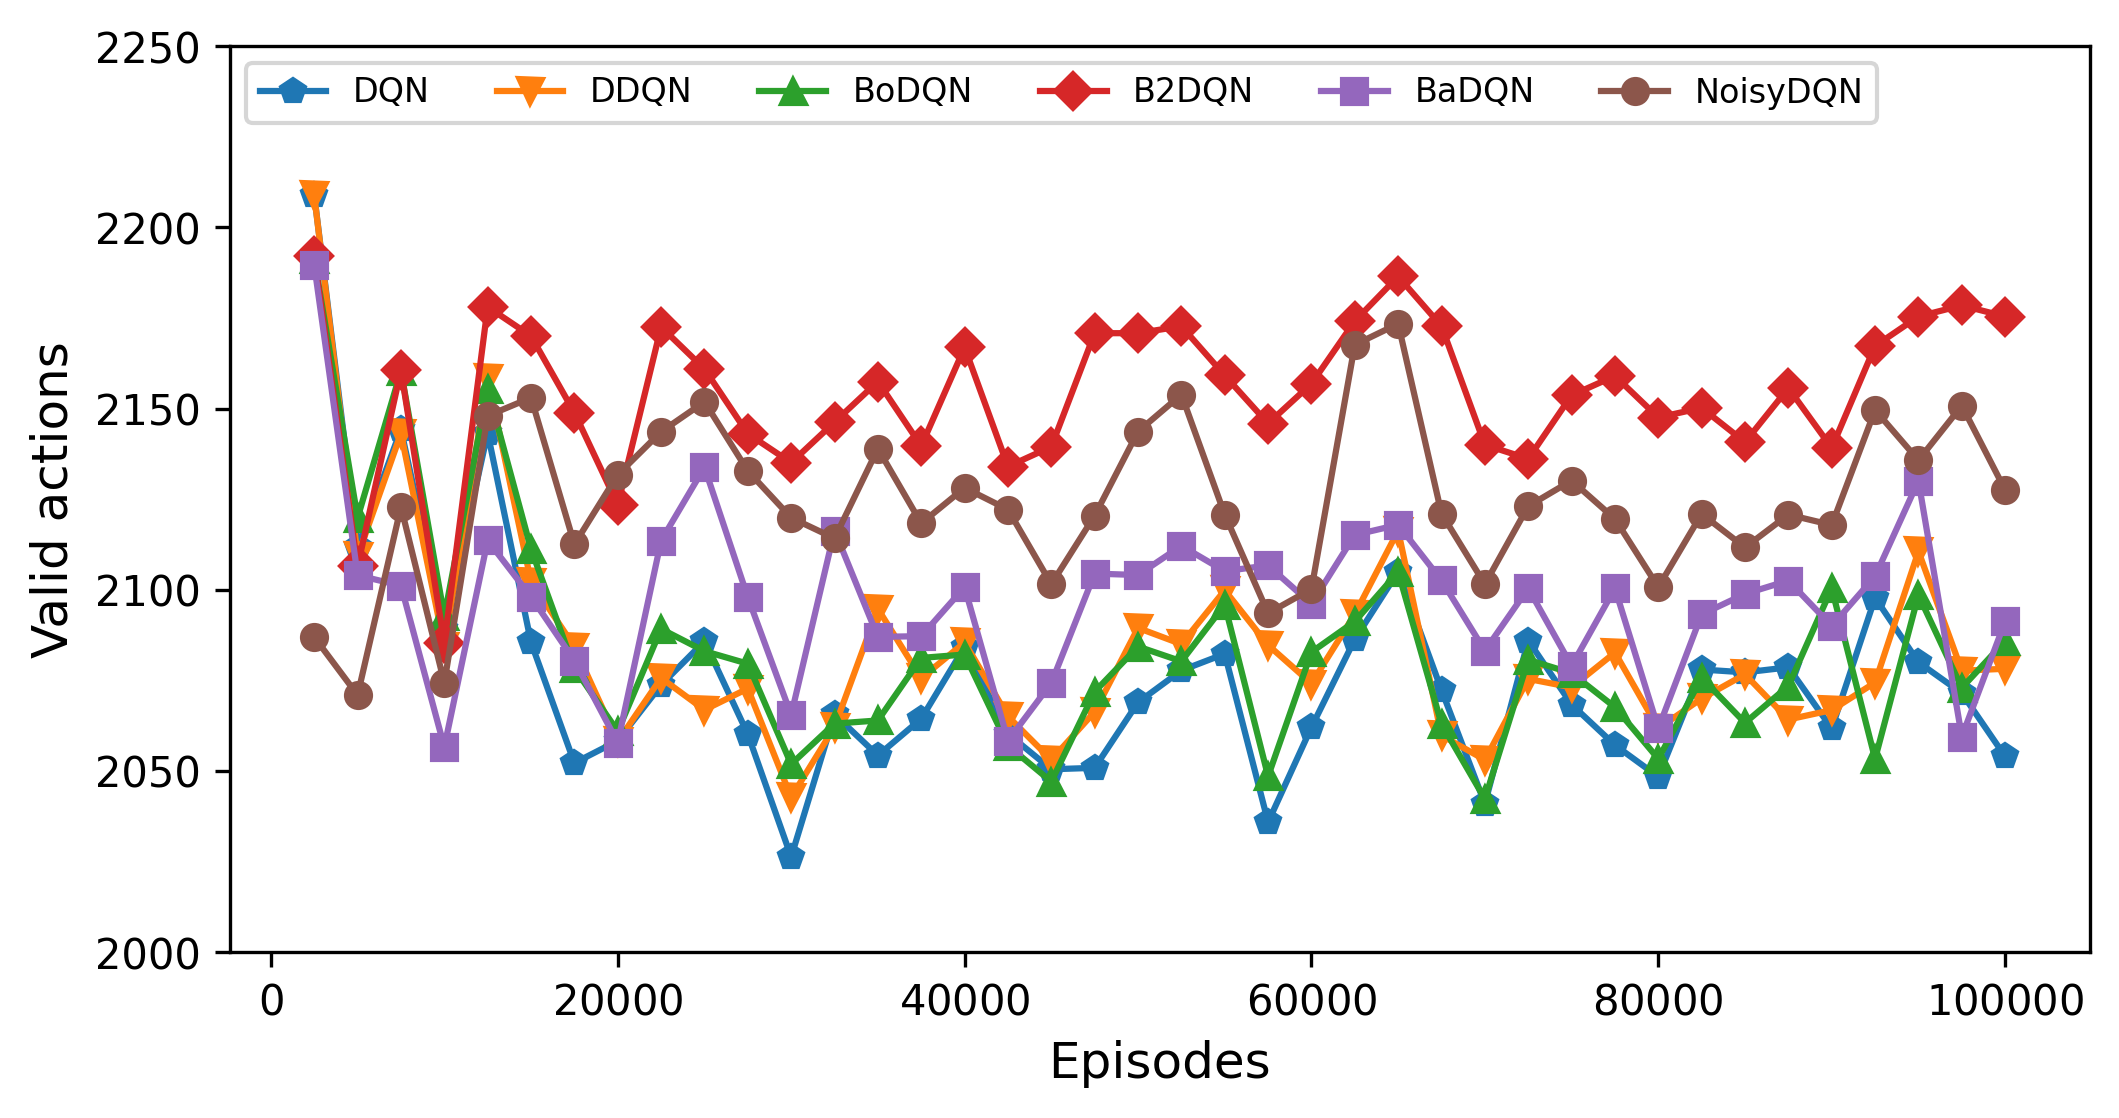

In [6]:

cwd = os.getcwd()
interval_stat = 2500
title = 'valid_actions' #rewards conv_episodes_cum successful_cum valid_actions_sum valid_actions_cum

def prep (x):
    x['interval'] = np.ceil((x['episode'])/interval_stat)    
    x_rewards = x.groupby(['interval'], as_index=False).agg({'reward':np.mean, 'timesteps':np.sum, 'successful':np.sum})
    x_rewards['valid_actions'] = x_rewards['timesteps'] - interval_stat
    x_conv = x[x['timesteps']==10].groupby(['interval'], as_index=False).agg({'timesteps':np.size})
    x_stat = pd.merge(x_rewards, x_conv, on='interval', how='left')
    x_stat = x_stat.fillna(0)
    x_stat['reword_mean_cum'] = x_stat['reward'].cumsum()
    x_stat['valid_actions_cum'] = x_stat['valid_actions'].cumsum()
    x_stat['successful_cum'] = x_stat['successful'].cumsum()
    return x_stat

def prep_stat (cwd):
    df = pd.DataFrame()
    for root, dirs, files in os.walk(cwd):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                df_t = pd.read_table(os.path.join(root,file), sep=',')
                df = df.append(prep(df_t))
    return df.groupby(['interval'], as_index=False).mean(), df.groupby(['interval'], as_index=False).std()

b2_cwd = cwd+str("/fig_b2dqn")
ba_cwd = cwd+str("/fig_badqn")
bo_cwd = cwd+str("/fig_bodqn")
noisynet_cwd = cwd+str("/fig_noisynet")
ddqn_cwd = cwd+str("/fig_ddqn")
dqn_cwd = cwd+str("/fig_dqn")

# dqn, dqn_std = prep_stat(dqn_cwd)
ddqn, ddqn_std = prep_stat(ddqn_cwd)
bo, bo_std = prep_stat(bo_cwd)
ba, ba_std = prep_stat(ba_cwd)
noisynet, noisynet_std = prep_stat(noisynet_cwd)
b2, b2_std = prep_stat(b2_cwd)

fig, ax1 = plt.subplots()
ax1.plot(dqn['interval'], dqn[title], marker='p', label='DQN')
ax1.plot(ddqn['interval'], ddqn[title], marker='v', label='DDQN')
ax1.plot(bo['interval'], bo[title], marker='^', label='BoDQN')
ax1.plot(b2['interval'], b2[title], marker='D', label='B2DQN')
ax1.plot(ba['interval'], ba[title], marker='s', label='BaDQN')
ax1.plot(noisynet['interval'], noisynet[title], marker='o', label='NoisyDQN')

plt.ylim(2000,2250)
ax1.legend(prop={'size': 8}, loc='upper left', ncol=7, numpoints = 1)
ax1.set_xlabel('Episodes', fontsize=12)
ax1.set_ylabel('Valid actions', fontsize=12)

x_up = 100000/interval_stat
x_0 = 0
x_1 = x_up*0.2
x_2 = x_up*0.4
x_3 = x_up*0.6
x_4 = x_up*0.8
plt.xticks([x_0, x_1, x_2, x_3, x_4, x_up], [r'$0$', r'$20000$', r'$40000$', r'$60000$', r'$80000$', r'$100000$'])
plt.savefig('VA.png')
plt.show()

# Table.III Comparison of performance

In [7]:
interval_stat=1000

Table_1 = 'successful'
Table_2 = 'reward'
cwd = os.getcwd()

def prep_stat (cwd, interval_stat):
    df = pd.DataFrame()
    for root, dirs, files in os.walk(cwd):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                df_t = pd.read_table(os.path.join(root,file), sep=',')
                x = df_t
                x['interval'] = np.ceil((x['episode'])/interval_stat)
                x_rewards = x.groupby(['interval'], as_index=False).agg({'successful':np.sum})
                
                temp = {'reward':df_t['reward'].mean(), "successful":x_rewards['successful'].mean()}
                df = df.append(temp, ignore_index=True)
    return df.mean()

def process_table(dir_M, interval_stat):
    cwd = os.getcwd()
    dqn = prep_stat( cwd + dir_M +str("/dqn"), interval_stat)
    ddqn = prep_stat(cwd + dir_M +str("/ddqn"), interval_stat)
    bo = prep_stat(cwd + dir_M +str("/bodqn"), interval_stat)
    ba = prep_stat(cwd + dir_M +str("/badqn"), interval_stat)
    noisynet = prep_stat(cwd+ dir_M + str("/noisynet"), interval_stat)
    b2 = prep_stat(cwd+ dir_M + str("/b2dqn"), interval_stat)
    return dqn, ddqn, bo, ba, noisynet, b2

dir_M = "/tab_M4"
M4_dqn, M4_ddqn, M4_bo, M4_ba, M4_noisynet, M4_b2 = process_table(dir_M, interval_stat)
dir_M = "/tab_M8"
M8_dqn, M8_ddqn, M8_bo, M8_ba, M8_noisynet, M8_b2 = process_table(dir_M, interval_stat)
dir_M = "/tab_M16"
M16_dqn, M16_ddqn, M16_bo, M16_ba, M16_noisynet, M16_b2 = process_table(dir_M, interval_stat)
dir_M = "/tab_M32"
M32_dqn, M32_ddqn, M32_bo, M32_ba, M32_noisynet, M32_b2 = process_table(dir_M, interval_stat)
dir_M = "/tab_M64"
M64_dqn, M64_ddqn, M64_bo, M64_ba, M64_noisynet, M64_b2 = process_table(dir_M, interval_stat)

T_M4 = pd.DataFrame()
T_M4['Algorithm'] = ['dqn','ddqn','bodqn','badqn','noisynet','b2dqn']
T_M4['M'] = 4
T_M4[Table_1] = [M4_dqn[Table_1].mean(), M4_ddqn[Table_1].mean(),M4_bo[Table_1].mean(), M4_ba[Table_1].mean(), M4_noisynet[Table_1].mean(), M4_b2[Table_1].mean()]
T_M4[Table_2] = [M4_dqn[Table_2].mean(), M4_ddqn[Table_2].mean(),M4_bo[Table_2].mean(), M4_ba[Table_2].mean(), M4_noisynet[Table_2].mean(), M4_b2[Table_2].mean()]
T_M8 = pd.DataFrame()
T_M8['Algorithm'] = ['dqn','ddqn','bodqn','badqn','noisynet','b2dqn']
T_M8['M'] = 8
T_M8[Table_1] = [M8_dqn[Table_1].mean(), M8_ddqn[Table_1].mean(),M8_bo[Table_1].mean(), M8_ba[Table_1].mean(), M8_noisynet[Table_1].mean(), M8_b2[Table_1].mean()]
T_M8[Table_2] = [M8_dqn[Table_2].mean(), M8_ddqn[Table_2].mean(),M8_bo[Table_2].mean(), M8_ba[Table_2].mean(), M8_noisynet[Table_2].mean(), M8_b2[Table_2].mean()]
T_M16 = pd.DataFrame()
T_M16['Algorithm'] = ['dqn','ddqn','bodqn','badqn','noisynet','b2dqn']
T_M16['M'] = 16
T_M16[Table_1] = [M16_dqn[Table_1].mean(), M16_ddqn[Table_1].mean(),M16_bo[Table_1].mean(), M16_ba[Table_1].mean(), M16_noisynet[Table_1].mean(), M16_b2[Table_1].mean()]
T_M16[Table_2] = [M16_dqn[Table_2].mean(), M16_ddqn[Table_2].mean(),M16_bo[Table_2].mean(), M16_ba[Table_2].mean(), M16_noisynet[Table_2].mean(), M16_b2[Table_2].mean()]
T_M32 = pd.DataFrame()
T_M32['Algorithm'] = ['dqn','ddqn','bodqn','badqn','noisynet','b2dqn']
T_M32['M'] = 32
T_M32[Table_1] = [M32_dqn[Table_1].mean(), M32_ddqn[Table_1].mean(),M32_bo[Table_1].mean(), M32_ba[Table_1].mean(), M32_noisynet[Table_1].mean(), M32_b2[Table_1].mean()]
T_M32[Table_2] = [M32_dqn[Table_2].mean(), M32_ddqn[Table_2].mean(),M32_bo[Table_2].mean(), M32_ba[Table_2].mean(), M32_noisynet[Table_2].mean(), M32_b2[Table_2].mean()]
T_M64 = pd.DataFrame()
T_M64['Algorithm'] = ['dqn','ddqn','bodqn','badqn','noisynet','b2dqn']
T_M64['M'] = 64
T_M64[Table_1] = [M64_dqn[Table_1].mean(), M64_ddqn[Table_1].mean(),M64_bo[Table_1].mean(), M64_ba[Table_1].mean(), M64_noisynet[Table_1].mean(), M64_b2[Table_1].mean()]
T_M64[Table_2] = [M64_dqn[Table_2].mean(), M64_ddqn[Table_2].mean(),M64_bo[Table_2].mean(), M64_ba[Table_2].mean(), M64_noisynet[Table_2].mean(), M64_b2[Table_2].mean()]               
T = pd.concat([T_M4,T_M8,T_M16,T_M32,T_M64])
T = T.groupby(['Algorithm', 'M'], as_index=False).agg({Table_1:np.mean, Table_2:np.mean})
T.pivot_table(values=[Table_1, Table_2], index=['Algorithm'], columns=['M'])

reward                                             successful  \
M                 4          8          16         32         64         4    
Algorithm                                                                     
b2dqn      66.877700  53.745793  43.402257  34.623367  28.012063   2.313333   
badqn      62.901790  51.138277  41.580873  33.826397  26.756510   1.560000   
bodqn      63.240757  51.473323  42.458347  34.394713  28.182680   0.483333   
ddqn       63.338870  51.001430  41.636937  33.976753  27.595793   0.750000   
dqn        62.787473  51.325277  41.803023  34.268140  27.308260   0.386667   
noisynet   64.702803  52.421707  42.463470  34.584330  27.821863   1.600000   

                                                   
M                8         16        32        64  
Algorithm                                          
b2dqn      1.306667  0.666667  0.380000  0.226667  
badqn      0.953333  0.116667  0.033333  0.220000  
bodqn      0.220000  0.150000  0.080000  0.053333  
ddqn       0.333333  0.163333  0.083333  0.053333  
dqn        0.230000  0.153333  0.090000  0.056667  
noisynet   0.813333  0.530000  0.256667  0.170000